# 应用随机过程

大家好，欢迎大家来到随机过程的世界！随机过程的世界是构建在概率论的世界上的，它拥有比概率论更为广阔的视野。那么，随机过程相比于概率论做了哪些深化的研究呢？首先，概率论仅仅研究的是在某一个时点，某个随机变量（随机向量）的分布情况，如：2022年07月03日这天的某个股票价格在开盘前是一个随机变量，因为在开盘前这个价格可以是$(0, +\infty)$的任意值，但是每个价格的概率是有差别的。而随机过程描述的是一段时间内随机变量的分布的变化，如：2022年07月03日这天的某个股票价格在开盘前是一个随机变量，而2022年07月04日这天的某个股票价格在开盘前也是一个随机变量，这两个随机变量按道理不会差别太大（也有可能差别很大），如果差别太大了估计就是暴跌或者暴涨了，我们说这种随机变量的分布按照时间变化的性质可以使用随机过程来描述。因此，总结一下：随机过程就是在随机变量的基础上加入了时间维度（值得注意的是，时间维度不是随机变量，只是普通变量），随机过程与概率论有很强的关联性，又有不同。

下面，我们来看看这门课的主要章节内容：
- 第一部分：随机过程的几个基本概念：
   - 随机过程的基本概念
   - 随机过程的基本类型：平稳过程（严平稳和宽平稳）、独立增量过程
- 第二部分：泊松过程：
   - 什么是计数过程
   - 泊松过程的几个定义
   - 泊松过程的合成和分解
   - 复合泊松过程
   - 泊松过程的案例：
      - 道路口的车辆数统计
      - 复合泊松过程案例
- 第三部分：马尔可夫过程：
   - 什么是马尔可夫性
   - 初始分布、转移概率与转移概率矩阵
   - 平稳分布
   - 马尔可夫过程的案例：
      - 艾滋病发展的分析
- 第四部分：实战建模
   - 泊松过程的合成和分解：十字路口交通压力仿真
   - 马尔可夫过程：预测上证指数的涨跌问题

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline 
plt.rcParams['font.sans-serif']=['SimHei','Songti SC','STFangsong']
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

## 1. 随机过程的基本概念

在概率论中，随机变量的个数主要有一维随机变量、多维随机变量、大数定律中也涉及无穷个随机变量，但它们之间是相互独立的。随着实际问题的不断涌出，我们不仅需要对随机变量本身进行研究（如随机变量的分布函数、密度函数等等），也要开始研究随机现象的变化过程。在这个前提下，我们必须考虑无限多个随机变量的一次观测，与大数定律不同的是：这些无限多个随机变量可能并不是相互独立的。**因此，我们将需要研究的无穷多个随机变量（很多情况不是相互独立的）称为随机过程。** 

### 1.1 随机过程的几个基本概念

（1）概率空间$(\Omega, \mathscr{F}, P)$

先来回忆下概率论的几个基本概念：随机试验的可能结果称为样本点或基本事件， 记为 $\omega$ 。样本点的全体称为样本空间， 记为 $\Omega$ 。样本空间 $\Omega$ 称为必然事件， 空集 $\varnothing$ 称为不可能事件。 $\Omega$ 的子集 $A$ 由基本事件组成， 称为事件。在实际研究问题中，我们往往并不是对样本空间的所有子集（所有事件）都关心，而是关心关心某些重要事件以及重要事件的可能性大小，因此需要一个概念来刻画我们感兴趣的事件：

概率空间$(\Omega, \mathscr{F}, P)$：设 $\Omega$ 是一个样本空间（或任意一个集合)， $\mathscr{F}$ 是 $\Omega$ 的某些子集组成的集合族（可以理解为集合的集合）。如果满足
- (1) $\Omega \in \mathscr{F}$；
- (2) 若 $A \in \mathscr{F}$， 则 $A^{\mathrm{c}}=\Omega \backslash A \in \mathscr{F}$;
- (3) 若 $A_{n} \in \mathscr{F}(n=1,2, \cdots)$， 则 $\bigcup_{n=1} A_{n} \in \mathscr{F}$。

则称 $\mathscr{F}$ 为 $\Omega$ 上的一个 $\sigma$ 代数， $(\Omega, \mathscr{F})$ 称为可测空间，$(\Omega, \mathscr{F}, P)$为概率空间。

（2）随机过程：

随机过程是概率空间$(\Omega, \mathscr{F}, P)$上的一族随机变量$\{X(t), t \in T \}$，其中$T$被称为指标集或参数集。

其实，随机过程的概念大家可以简单理解为一组按时间不断排列的随机变量，这组随机变量中的随机变量间可能有关系，可能没有关系。下面以几个例子说明什么是随机过程：

案例一：随机漫步的傻瓜

一个醉汉傻瓜在路上行走，这个醉汉每次只会向前或者向后走一步，他会以概率$p$前进一步，以概率1-p后退一步。现在，我们需要模拟醉汉的行走轨迹。（假设$X(t)$表示醉汉在$t$时刻的位置，则$X(t)$就是一个随机过程，这个随机过程叫做随机游动。）


[0, 1, 2, 1, 2, 3, 2, 3, 2, 1, 0]


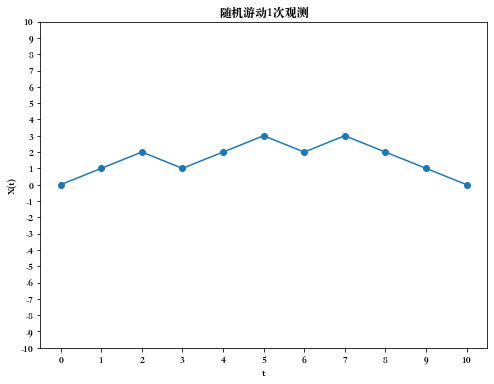

In [2]:
# 模拟醉汉傻瓜的前进轨迹（一条轨迹）
from scipy.stats import bernoulli
def go_random(p, n_steps):
    random_step = [] #记录前进的位置
    random_step.append(0)  # 初始位置在0点
    r = np.array(bernoulli.rvs(p, size=n_steps))
    r[r==0] = -1
    random_step += np.cumsum(r).tolist()
    print(random_step) # 打印当前位置
    return random_step

random_steps = go_random(0.6, 10)
plt.figure(figsize=(8, 6))
plt.scatter(x=np.arange(len(random_steps)), y=random_steps)
plt.plot(np.arange(len(random_steps)), random_steps)
plt.xlabel("t")
plt.ylabel("X(t)")
plt.title("随机游动1次观测")
plt.xticks(np.arange(11))
plt.yticks(np.arange(-10, 11))
plt.show()

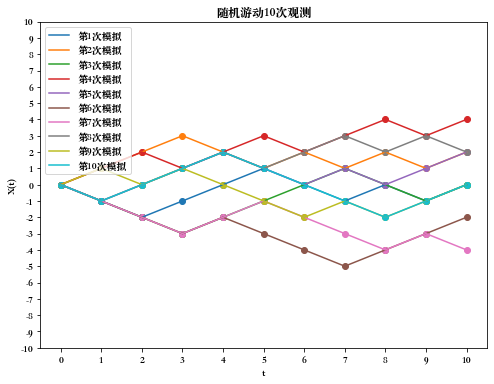

In [3]:
# 模拟醉汉傻瓜的前进轨迹（10条轨迹）
from scipy.stats import bernoulli
def go_random(p, n_steps):
    random_step = [] #记录前进的位置
    random_step.append(0)  # 初始位置在0点
    r = np.array(bernoulli.rvs(p, size=n_steps))
    r[r==0] = -1
    random_step += np.cumsum(r).tolist()
    return random_step

plt.figure(figsize=(8, 6))
for i in range(10):
    random_steps = go_random(0.5, 10)
    plt.scatter(x=np.arange(len(random_steps)), y=random_steps)
    plt.plot(np.arange(len(random_steps)), random_steps, label='第'+str(i+1)+'次模拟')
plt.xlabel("t")
plt.ylabel("X(t)")
plt.title("随机游动10次观测")
plt.xticks(np.arange(11))
plt.yticks(np.arange(-10, 11))
plt.legend()
plt.show()

由此可见，傻瓜在每个时刻的位置都是一个随机变量，如在$t=2$处，有三个观测点，这三个观测点分别都是来自于$t=2$时的随机变量$X(2)$的一个采样（注意，$X(2)$是一个随机变量而不是一个数值或者一个普通变量）。

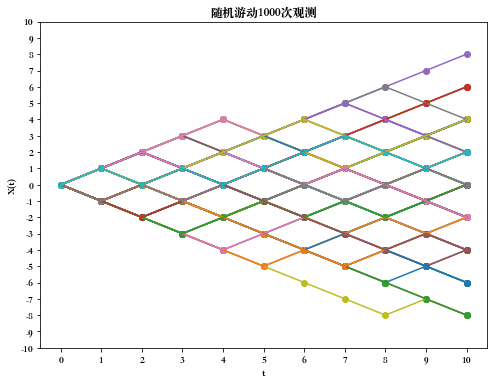

In [4]:
# 模拟醉汉傻瓜的前进轨迹（100条轨迹）
from scipy.stats import bernoulli
def go_random(p, n_steps):
    random_step = [] #记录前进的位置
    random_step.append(0)  # 初始位置在0点
    r = np.array(bernoulli.rvs(p, size=n_steps))
    r[r==0] = -1
    random_step += np.cumsum(r).tolist()
    return random_step

plt.figure(figsize=(8, 6))
for i in range(100):
    random_steps = go_random(0.5, 10)
    plt.scatter(x=np.arange(len(random_steps)), y=random_steps)
    plt.plot(np.arange(len(random_steps)), random_steps, label='第'+str(i+1)+'次模拟')
plt.xlabel("t")
plt.ylabel("X(t)")
plt.title("随机游动1000次观测")
plt.xticks(np.arange(11))
plt.yticks(np.arange(-10, 11))
plt.show()

（3）有限维分布族：

对于一个或者有限多个随机变量来说，了解随机变量的分布函数就能掌握随机变量的全部面貌。但是对于随机过程$\{X(t), t \in T\}$来说，由于随机变量的个数是无限的，因此想要了解随机过程的全貌，必须知道：每个时刻$t$的随机变量$t \in T, X(t)$的分布函数$F(t, x)=P\{X(t) \leqslant x\}$、任意两个时刻的$t_1, t_2 \in T$的二维随机变量$(X(t_1), X(t_2))$的二维联合分布函数$F_{t_1, t_2}(x_{1}, x_{2})=P\left\{X\left(t_{1}\right) \leqslant x_{1}, X\left(t_{2}\right) \leqslant x_{2}\right\}$以及**任意$n$个时刻**的随机变量的联合分布函数$F_{t_{1}, t_{2}, \cdots, t_{n}}\left(x_{1}, x_{2}, \cdots, x_{n}\right)=P\left\{X\left(t_{1}\right) \leqslant x_{1}, X\left(t_{2}\right) \leqslant x_{2}, \cdots, X\left(t_{n}\right) \leqslant x_{n}\right\}$。

因此，描述完整的随机过程的全貌需要**一族分布函数**，这族分布函数叫做随机过程$\{X(t), t \in T\}$的有限维分布族:
$$
\left\{F_{t_{1}, t_{2}, \cdots, t_{n}}\left(x_{1}, x_{2}, \cdots, x_{n}\right), t_{1}, t_{2}, \cdots, t_{n} \in T\right. ,n \geqslant 1\}
$$


（4）随机过程的数字特征：

在概率论中，我们有时候不需要知道随机变量的方方面面，因此有时候我们不需要存储一整个随机变量的分布函数，因为这是件十分困难的事情。我们可能需要知道的是这个随机变量的某个特征，如：平均水平、中间位置水平、离散程度等等，这些只反映随机变量的某个侧面信息的数字成为随机变量的数字特征，如：数学期望、方差/标准差、分位数等等。在随机过程中，随机过程$\{X(t), t \in T\}$的有限维分布族能反映随机过程的方方面面，但是有时候求随机过程的有限维分布族是一件十分困难的事情，因此我们也想像随机变量一样使用“数字特征”的概念。随机过程$\{X(t), t \in T\}$的常见的数字特征有：均值函数、方差函数、协方差函数、自相关函数等等。为什么随机变量的数字特征是一个数字而随机过程的数字特征是一个函数呢？因为随机过程是在随机变量的基础上添加一个时间维度，因此随机过程的数字特征也由随机变量的数字变成了以时间$t$为变量的函数。

（4.1）均值函数：设 $\{X(t), t \in T\}$ 是一随机过程，称 $X(t)$ 的期望 $\mu_{X}(t)=E[X(t)]$ 为过程的均值函数（如果存在的话)。

我们还是使用随机漫步的傻瓜这个随机过程，简单理解均值函数的概念！
  

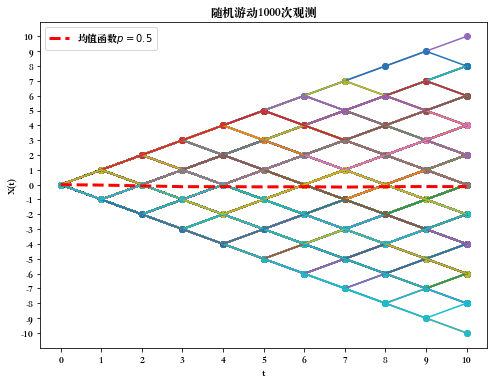

In [5]:
# 模拟醉汉傻瓜的前进轨迹（1000条轨迹），并绘制均值函数（p=0.5）
from scipy.stats import bernoulli
def go_random(p, n_steps):
    random_step = [] #记录前进的位置
    random_step.append(0)  # 初始位置在0点
    r = np.array(bernoulli.rvs(p, size=n_steps))
    r[r==0] = -1
    random_step += np.cumsum(r).tolist()
    return random_step

mean_step = []
plt.figure(figsize=(8, 6))
for i in range(1000):
    random_steps = go_random(0.5, 10)
    mean_step.append(random_steps) #存储每次实验的结果
    plt.scatter(x=np.arange(len(random_steps)), y=random_steps)
    plt.plot(np.arange(len(random_steps)), random_steps)
mean_var = np.array(mean_step).mean(axis=0)
mean_var = np.mean(np.array(mean_step), axis=0)
plt.plot(np.arange(len(random_steps)), mean_var, lw=3, c='red', ls='--', label=r'均值函数$p=0.5$')
plt.xlabel("t")
plt.ylabel("X(t)")
plt.title("随机游动1000次观测")
plt.xticks(np.arange(11))
plt.yticks(np.arange(-10, 11))
plt.legend()
plt.show()

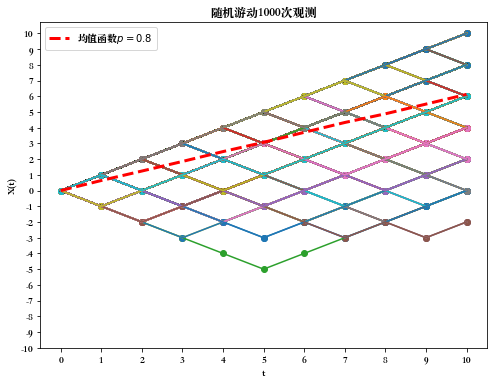

In [6]:
# 模拟醉汉傻瓜的前进轨迹（1000条轨迹），并绘制均值函数（p=0.8）
from scipy.stats import bernoulli
def go_random(p, n_steps):
    random_step = [] #记录前进的位置
    random_step.append(0)  # 初始位置在0点
    r = np.array(bernoulli.rvs(p, size=n_steps))
    r[r==0] = -1
    random_step += np.cumsum(r).tolist()
    return random_step

mean_step = []
plt.figure(figsize=(8, 6))
for i in range(1000):
    random_steps = go_random(0.8, 10)
    mean_step.append(random_steps) #存储每次实验的结果
    plt.scatter(x=np.arange(len(random_steps)), y=random_steps)
    plt.plot(np.arange(len(random_steps)), random_steps)
mean_var = np.array(mean_step).mean(axis=0)
mean_var = np.mean(np.array(mean_step), axis=0)
plt.plot(np.arange(len(random_steps)), mean_var, lw=3, c='red', ls='--', label=r'均值函数$p=0.8$')
plt.xlabel("t")
plt.ylabel("X(t)")
plt.title("随机游动1000次观测")
plt.xticks(np.arange(11))
plt.yticks(np.arange(-10, 11))
plt.legend()
plt.show()

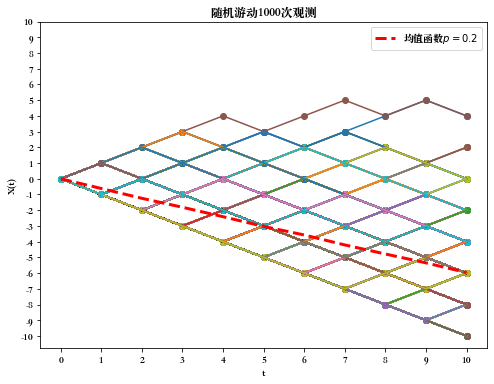

In [7]:
# 模拟醉汉傻瓜的前进轨迹（1000条轨迹），并绘制均值函数（p=0.2）
from scipy.stats import bernoulli
def go_random(p, n_steps):
    random_step = [] #记录前进的位置
    random_step.append(0)  # 初始位置在0点
    r = np.array(bernoulli.rvs(p, size=n_steps))
    r[r==0] = -1
    random_step += np.cumsum(r).tolist()
    return random_step

mean_step = []
plt.figure(figsize=(8, 6))
for i in range(1000):
    random_steps = go_random(0.2, 10)
    mean_step.append(random_steps) #存储每次实验的结果
    plt.scatter(x=np.arange(len(random_steps)), y=random_steps)
    plt.plot(np.arange(len(random_steps)), random_steps)
mean_var = np.array(mean_step).mean(axis=0)
mean_var = np.mean(np.array(mean_step), axis=0)
plt.plot(np.arange(len(random_steps)), mean_var, lw=3, c='red', ls='--', label=r'均值函数$p=0.2$')
plt.xlabel("t")
plt.ylabel("X(t)")
plt.title("随机游动1000次观测")
plt.xticks(np.arange(11))
plt.yticks(np.arange(-10, 11))
plt.legend()
plt.show()

通过以上案例可以看到，其实均值函数通俗来说就是每个时刻的随机变量的均值组成的函数，它自然而然就是一个关于时间的函数。

（4.2）方差函数

与均值函数对应的，方差函数$\operatorname{Var}[X(t)]=\gamma(t, t)$通俗来说就是每个时刻的随机变量的方差形成的关于时间$t$的函数。

案例：$X(t)=X_{0}+t V(a \leqslant t \leqslant b)$， 其中 $X_{0}$ 和 $V$ 是相互独立且均服从 $N(0,1)$ 分布的随机变量，求随机过程$\{X(t), t \in T \}$的方差函数。

均值函数：
$$
\begin{aligned}
\mu_{X}(t) &=E[X(t)]=E\left(X_{0}+t V\right) \\
&=E\left(X_{0}\right)+t E(V)=0
\end{aligned}
$$
方差函数：
$$
\begin{aligned}
\operatorname{Var}[X(t)]&=\gamma(t, t) = E[X^2(t)] - E[X(t)]^2\\
&=E[X_{0}^2+t^2V^2+2tX_{0}V]\\
&=1+t^2
\end{aligned}
$$

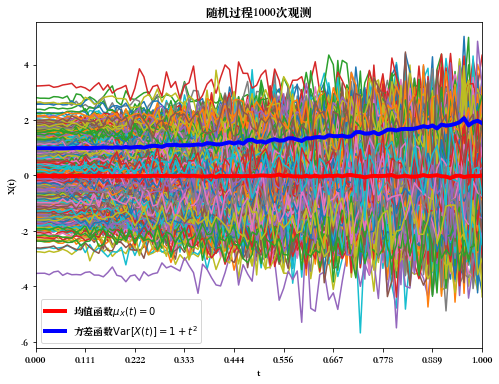

In [8]:
# 模拟随机过程{X(t) t in T} 1000次的观测轨迹，并绘制均值函数和方差函数
def x_t_random(a, b, n_step):
    sample_list = []
    t_T = np.linspace(a, b, n_step)
    X0 = np.random.randn()
    for t in t_T:
        sample_list.append(X0 + t * np.random.randn())
    return sample_list
a, b, n_step, n_times = 0, 1, 100, 1000  # n_times代表模拟1000次
n_times_sample_list = [x_t_random(a, b, n_step) for _ in range(n_times)]  #所有实验结果
plt.figure(figsize=(8, 6))
for i in range(n_times):
    plt.plot(np.linspace(a, b, n_step), n_times_sample_list[i])
mean_var = np.array(n_times_sample_list).mean(axis=0)
var_var = np.array(n_times_sample_list).var(axis=0)
plt.plot(np.linspace(a, b, n_step), mean_var, lw=4, c='red', ls='-', label=r'均值函数$\mu_{X}(t)=0$')
plt.plot(np.linspace(a, b, n_step), var_var, lw=4, c='blue', ls='-', label=r'方差函数$\operatorname{Var}[X(t)]=1+t^2$')
plt.xlabel("t")
plt.ylabel("X(t)")
plt.title("随机过程1000次观测")
plt.xticks(np.linspace(a, b, 10))
plt.xlim(0,1)
plt.legend()
plt.show()

（4.3）协方差函数：$\gamma\left(t_{1}, t_{2}\right)=E\left\{\left[X\left(t_{1}\right)-\mu_{X}\left(t_{1}\right)\right]\left[X\left(t_{2}\right)-\mu_{X}\left(t_{2}\right)\right]\right\}\left(t_{1}, t_{2} \in T\right)$

在概率论中，讨论两个随机比变量的相关程度可以使用协方差，而$n$维随机变量则可以使用协方差矩阵。因此，在随机过程中，随机变量增加了一个时间维度后，协方差函数就变成了二元函数。

案例：$X(t)=X_{0}+t V(a \leqslant t \leqslant b)$， 其中 $X_{0}$ 和 $V$ 是相互独立且均服从 $N(0,1)$ 分布的随机变量，求随机过程$\{X(t), t \in T \}$的协方差函数。
$$
\begin{aligned}
\gamma\left(t_{1}, t_{2}\right) &=E\left[(X\left(t_{1}\right)-0) (X\left(t_{2}\right)-0)\right] \\
&=E\left[\left(X_{0}+t_{1} V\right)\left(X_{0}+t_{2} V\right)\right] \\
&=E\left(X_{0}^{2}\right)+t_{1} t_{2} E\left(V^{2}\right)=1+t_{1} t_{2}
\end{aligned}
$$

（4.4）自相关函数：$R_{X}(s, t)=E[X(s) X(t)]$ $(s, t \in T)$ 

(30, 30)


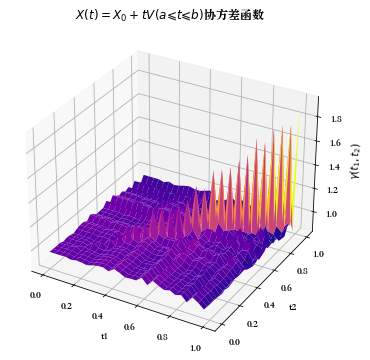

In [9]:
# 模拟随机过程{X(t) t in T} 1000次的观测轨迹，并绘制协方差函数
def x_t_random(a, b, n_step):
    sample_list = []
    t_T = np.linspace(a, b, n_step)
    X0 = np.random.randn()
    for t in t_T:
        sample_list.append(X0 + t * np.random.randn())
    return sample_list
a, b, n_step, n_times = 0, 1, 30, 1000  # n_times代表模拟1000次
n_times_sample_arr = np.array([x_t_random(a, b, n_step) for _ in range(n_times)]) #所有实验结果
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(projection='3d')
t1 = np.linspace(a, b, n_step)
t2 = np.linspace(a, b, n_step)
t1, t2 = np.meshgrid(t1, t2)
gamma_t = []
for i in range(n_step):
    tmp = []
    for j in range(n_step):
        tmp.append(np.mean((n_times_sample_arr[:,i]-np.mean(n_times_sample_arr[:,i]))*(n_times_sample_arr[:, j]-np.mean(n_times_sample_arr[:,j]))))
    gamma_t.append(tmp)
gamma_t = np.array(gamma_t)
print(gamma_t.shape)
ax.plot_surface(t1, t2, gamma_t, cmap='plasma')
ax.set_xlabel("t1")
ax.set_ylabel("t2")
ax.set_zlabel(r"$\gamma(t_1, t_2)$")
ax.set_title(r"$X(t)=X_{0}+t V(a \leqslant t \leqslant b)$协方差函数")
plt.show()

(30, 30)


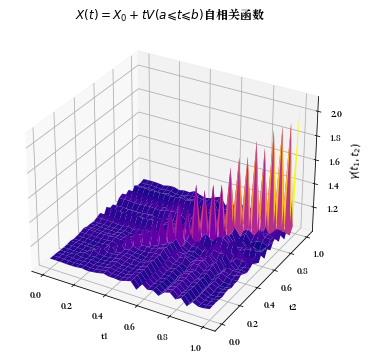

In [10]:
# 模拟随机过程{X(t) t in T} 1000次的观测轨迹，并绘制自相关函数
def x_t_random(a, b, n_step):
    sample_list = []
    t_T = np.linspace(a, b, n_step)
    X0 = np.random.randn()
    for t in t_T:
        sample_list.append(X0 + t * np.random.randn())
    return sample_list
a, b, n_step, n_times = 0, 1, 30, 1000  # n_times代表模拟1000次
n_times_sample_arr = np.array([x_t_random(a, b, n_step) for _ in range(n_times)]) #所有实验结果
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(projection='3d')
t1 = np.linspace(a, b, n_step)
t2 = np.linspace(a, b, n_step)
t1, t2 = np.meshgrid(t1, t2)
R_t = []
for i in range(n_step):
    tmp = []
    for j in range(n_step):
        tmp.append(np.mean((n_times_sample_arr[:,i])*(n_times_sample_arr[:, j])))
    R_t.append(tmp)
R_t = np.array(R_t)
print(R_t.shape)
ax.plot_surface(t1, t2, R_t, cmap='plasma')
ax.set_xlabel("t1")
ax.set_ylabel("t2")
ax.set_zlabel(r"$\gamma(t_1, t_2)$")
ax.set_title(r"$X(t)=X_{0}+t V(a \leqslant t \leqslant b)$自相关函数")
plt.show()

### 1.2 随机过程的基本类型

对于两个随机变量来说，两个随机变量的关系可以分为：一个随机变量与另一个随机变量之间是否同分布、一个随机变量与另一个随机变量之间是否独立。那么，对于随机过程来说，由于在任意$n$个时刻可以形成一个$n$维随机变量，这个$n$维随机变量由它的联合分布确定，而取不同的时间所得到的$n$维随机变量也是不一样的，因此我们可以根据随机过程内的$n$维随机变量之间的关系，即：是否同分布和是否独立，可以将随机过程分为**平稳过程**与**独立增量过程**等等，我们主要学习**平稳过程**与**独立增量过程**。

（1）严平稳过程：

说到一个过程的平稳，何为平稳是一个值得商榷的问题。平稳，在中文的字面意思是**不会变化太大**，那么回到随机变量来说什么叫不会变化太大呢？有一种情况是理论上保证“理论上的不会变化太大”，另一种情况是现实中看起来不会变化太大。严平稳就是“理论上的不会变化太大”，它描述的是随机变量在经过同一个时间段后的的随机变量之间的分布保持不变，由于随机变量的分布可以完全确定随机变量，而随机变量的分布保持一致就说明了随机变量在“理论上不会变化太大”，具体来说：

如果随机过程 $\{X(t), t \in T\}$ 对任意的 $t_{1}, t_{2}, \cdots, t_{n} \in T$ 和任意的 $h$ (使得 $\left.t_{i}+h \in T, i=1,2, \cdots, n\right)$ 有 $\left(X\left(t_{1}+h\right), X\left(t_{2}+h\right), \cdots, X\left(t_{n}+h\right)\right.$ ) 与 $\left(X\left(t_{1}\right), X\left(t_{2}\right), \cdots, X\left(t_{n}\right)\right)$ 具有相同的联合分布， 记为：
$$
\left(X\left(t_{1}+h\right), X\left(t_{2}+h\right), \cdots, X\left(t_{n}+h\right)\right) \stackrel{\mathrm{d}}{=}\left(X\left(t_{1}\right), X\left(t_{2}\right), \cdots, X\left(t_{n}\right)\right)
$$
则称 $\{X(t), t \in T\}$ 为严平稳的。

对于严平稳过程而言, 有限维分布关于时间是平移不变的，这个要求在绝大多数情况都过于严格，而且不容易被验证，毕竟计算一个有限维分布本身就是一件十分困难的事。通常情况下，我们需要实操性更强的平稳性，那就是所谓的“看起来平稳”的弱平稳。

（2）宽平稳过程：

宽平稳过程通俗来说就是看起来平稳，怎么样通俗理解弱平稳呢？在现实世界中，我们主要通过研究随机变量的一般水平（均值）和分散程度来大致刻画随机变量，并不需要完整知道随机变量的分布。因此，所谓的看起来平稳值得就是：随机过程的均值函数随时间平移以及随机过程的方差函数也是随着时间是无关的。具体来说：

如果随机过程 $X(t)$ 的所有二阶矩都存在， 并且 $E[X(t)]=\mu$, 协 方差函数 $\gamma(t, s)$ 只与时间差 $t-s$ 有关， 则称 $\{X(t), t \in T\}$ 为宽平稳过程或二阶平稳过程。

我们来通过几个案例通俗给大家直观理解“宽平稳”的含义：

案例一：白噪声序列（随机过程）

设 $\left\{X_{n}, n=0,1, \cdots\right\}$ 为一列两两互不相关的随机变量序列， 满足 $E\left(X_{n}\right)=0(n=0,1, \cdots)$， 且
$$
E\left(X_{m} X_{n}\right)= \begin{cases}0, & m \neq n \\ \sigma^{2}, & m=n\end{cases}
$$
则随机过程$\left\{X_{n}, n=0,1, \cdots\right\}$为白噪声序列。

这这里简要说明下为什么宽平稳过程需要“协方差函数 $\gamma(t, s)$ 只与时间差 $t-s$ 有关”这个条件。简单来说，如果一个随机过程的协方差函数与所在时间有关，那么意味着你这个过程的性质随时都在发生变化；与之对应的，如果一个过程的协方差函数只与时间间隔有关而与所在时刻无关，那么这意味着这个过程在所有时间起点上的性质都是相同的，这就看起来很平稳。

我们来看看这个白噪声序列的平稳性是如何体现的：
- 白噪声过程的一个样本轨迹是什么样子的
- 白噪声过程的均值函数和方差函数

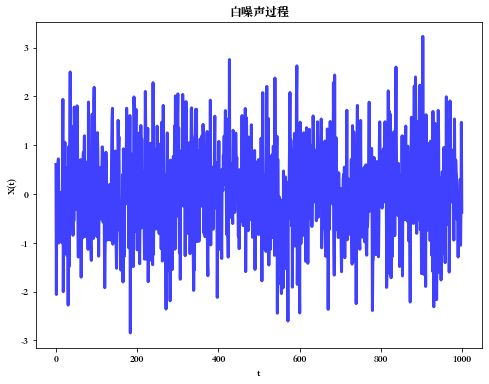

In [11]:
# 白噪声过程
def get_white_noise(n_steps):
    white_noise_ls = []
    for step in range(n_steps):
        noise_sample = np.random.randn()
        white_noise_ls.append(noise_sample)
    return white_noise_ls
n_steps = 1000
t = np.arange(n_steps)
plt.figure(figsize=(8,6))
plt.plot(t, np.array(get_white_noise(n_steps=n_steps)), lw=3, color='blue', alpha=0.75)
plt.xlabel("t")
plt.ylabel("X(t)")
plt.title("白噪声过程")
plt.show()

(1000, 10)


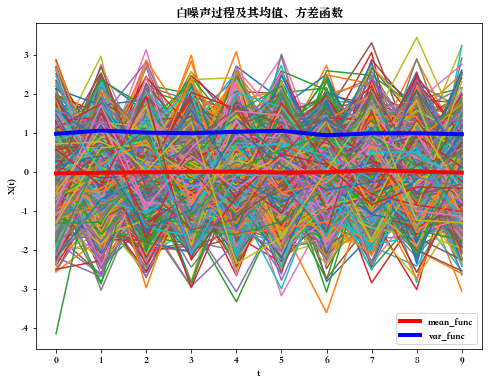

In [12]:
# 白噪声过程的均值和方差函数
def get_white_noise(n_steps):
    white_noise_ls = []
    for step in range(n_steps):
        noise_sample = np.random.randn()
        white_noise_ls.append(noise_sample)
    return white_noise_ls

n_steps, n_times = 10, 1000  # n_steps随机过程的时间t, n_times模拟这个过程的次数
simulate_result = np.array([get_white_noise(n_steps=n_steps) for _ in range(n_times)])
print(simulate_result.shape)
t_ls = np.arange(n_steps)
plt.figure(figsize=(8,6))
for i in range(n_times):
    plt.plot(t_ls, simulate_result[i])  # 绘制每次的轨迹
plt.plot(t_ls, np.mean(simulate_result, axis=0), lw=4, color='red', label='mean_func')
plt.plot(t_ls, np.var(simulate_result, axis=0), lw=4, color='blue', label='var_func')
plt.xlabel("t")
plt.ylabel("X(t)")
plt.title("白噪声过程及其均值、方差函数")
plt.xticks(np.arange(n_steps))
plt.legend()
plt.show()

案例二：滑动平均过程

设 $\left\{\varepsilon_{n}, n=0, \pm 1, \cdots\right\}$ 为一列两两互不相关的有相同均值 $\mu$ 和相同 方差 $\sigma^{2}$ 的随机变量序列， $a_{1}, a_{2}, \cdots, a_{k}$ 为任意 $k$ 个实数。考虑下列定义的序列：
$$
X_{n}=a_{1} \varepsilon_{n}+a_{2} \varepsilon_{n-1}+\cdots+a_{k} \varepsilon_{n-k+1}, \quad n=0, \pm 1, \pm 2, \cdots
$$
那么随机过程$\{X(t) \}$被称为滑动平均序列。

我们可以观察以下图表，看看滑动平均序列（随机过程）的平稳性：
- 一条滑动平均序列的样本轨迹
- 滑动平均序列的均值和方差函数

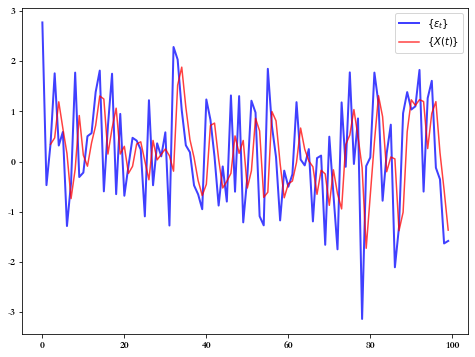

In [13]:
# 获得一条滑动平均序列
def get_esp_ls(n_steps):
    esp_ls = []
    for i in range(n_steps):
        esp_ls.append(np.random.randn())
    return esp_ls

def get_moving_avg(esp_ls, ak_ls):
    xn = []
    for i in range(len(esp_ls)-len(ak_ls)+1):
        tmp = 0
        for j in range(len(ak_ls)):
            tmp += esp_ls[i+j]*ak_ls[j]
        xn.append(tmp)
    return xn

n_steps = 100
esp_ls = get_esp_ls(n_steps=n_steps)
xn = get_moving_avg(esp_ls=esp_ls, ak_ls=[0.2, 0.6, 0.2])
t = np.arange(n_steps)
plt.figure(figsize=(8,6))
plt.plot(t, esp_ls, lw=2, color='blue', alpha=0.75, label=r'$\{ \epsilon_t \}$')
plt.plot(t[2:], xn, color='red', alpha=0.75, label=r'$\{ X(t) \}$')
plt.legend()
plt.show()

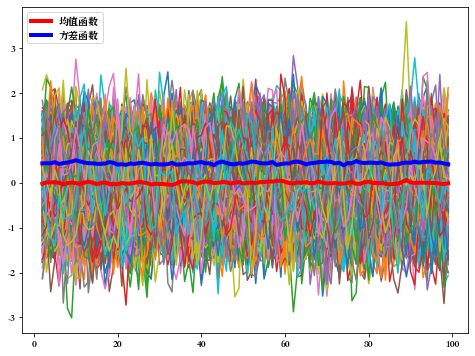

In [14]:
# 滑动平均序列(随机过程)的均值函数和方差函数
def get_esp_ls(n_steps):
    esp_ls = []
    for i in range(n_steps):
        esp_ls.append(np.random.randn())
    return esp_ls

def get_moving_avg(esp_ls, ak_ls):
    xn = []
    for i in range(len(esp_ls)-len(ak_ls)+1):
        tmp = 0
        for j in range(len(ak_ls)):
            tmp += esp_ls[i+j]*ak_ls[j]
        xn.append(tmp)
    return xn

n_steps, n_times = 100, 1000
simulate_result = np.array([get_moving_avg(get_esp_ls(n_steps=n_steps), [0.2, 0.6, 0.2]) for _ in range(n_times)])
t = np.arange(n_steps)
plt.figure(figsize=(8,6))
for i in range(n_times):
    plt.plot(t[2:], simulate_result[i])
plt.plot(t[2:], np.mean(simulate_result, axis=0), lw=4, color='red', label='均值函数')
plt.plot(t[2:], np.var(simulate_result, axis=0), lw=4, color='blue', label='方差函数')
plt.legend()
plt.show()

由以上两个案例：白噪声随机过程以及滑动平均随机过程可以简单看出，这两个过程都是宽平稳过程，而宽平稳过程的一个显然特性就是均值函数与方差函数随时间不变。宽平稳过程在实际中容易操作，因此在时间序列中运用十分广泛。

（3）独立增量过程：

对于两个随机变量来说，两个随机变量的关系可以分为：一个随机变量与另一个随机变量之间是否同分布、一个随机变量与另一个随机变量之间是否独立。刚刚我们已经学习了“同分布”的关系，即平稳性。现在，我们来学习另一个关系：一个随机变量与另一个随机变量之间是否独立。一般来说，随机过程任意两个时间的随机变量$X(t)$与$X(s)$之间是不独立的，因为在很多时候，前一个时刻的数据会深刻影响下一个时刻的数据，如：昨天股票跌停了，今天的股票价格必定会受到昨日信息的影响。因此，随机过程任意两个时间的随机变量$X(t)$与$X(s)$之间一般是不独立的。但是，大量的事实证明许多随机过程的增量是相互独立的，这种随机过程被称为独立增量过程。具体来说：

如果对任意 $t_{1}, t_{2}, \cdots, t_{n} \in T, t_{1}<t_{2}<\cdots<t_{n}$， 随机变量 $X\left(t_{2}\right)-$ $X\left(t_{1}\right), X\left(t_{3}\right)-X\left(t_{2}\right), \cdots, X\left(t_{n}\right)-X\left(t_{n-1}\right)$ 是相互独立的， 则称 $\{X(t), t \in T\}$ 是 独立增量过程。

如果对任意 $t_{1}, t_{2}$, 有 $X\left(t_{1}+h\right)-X\left(t_{1}\right) \stackrel{\mathrm{d}}{=} X\left(t_{2}+h\right)-X\left(t_{2}\right)$, 则称 $\{X(t), t \in T\}$ 是 平稳增量过程。

兼有独立增量和平稳增量的过程称为平稳独立增量过程。

我们来看一个平稳独立增量过程的随机过程案例：布朗运动，我们在这里先不抠布朗运动的具体数学定义，我们来通俗定义布朗运动。考虑在一直线上的简单的、 对称的随机游动。 设质点每经过 $\Delta t$ 时间，随机地以概率 $p=1 / 2$ 向右移 $\Delta x>0$，以概率 $q=1 / 2$ 向左移动一个 $\Delta x$ ，且每次移动相互独立。 若 $X_{t}$ 表示 $t$ 时刻 质点的位置，且有 $\Delta t \rightarrow 0$ 时 $\Delta x=c \sqrt{\Delta t}$ ，则
$$
X_{t} \sim N\left(0, c^{2} t\right)
$$
这个随机过程就是著名的“布朗运动”，将布朗运动与股票价格行为联系在一起，进而建立起维纳过程的数学模型是本世纪的一项具有重要意义的金融创新，在现代金融数学中占有重要地位。迄今，普遍的观点仍认为，股票市场是随机波动的，随机波动是股票市场最根本的特性，是股票市场的常态。布朗运动假设是现代资本市场理论的核心假设。（我们在《随机模拟》章节对布朗运动进行详细的阐述～）

我们来看看平稳独立增量的随机过程有什么有用的性质，我们先用python模拟一段随机漫步，观察随机漫步的均值函数和增量的均值函数：

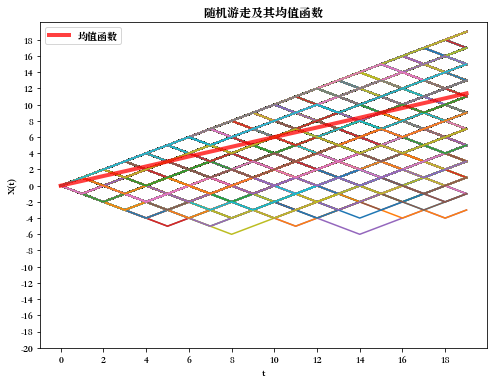

In [15]:
# 模拟随机游走并绘制均值函数
def get_brown(p, n_steps):
    brown_ls = []
    x_0 = 0
    brown_ls.append(x_0)
    for i in range(n_steps-1):
        p_i = np.random.rand()
        if p_i <= p:
            brown_ls.append(x_0+1)
            x_0 += 1
        else:
            brown_ls.append(x_0-1)
            x_0 -= 1
    return brown_ls
simulate_brown_ls = []
p, n_steps, n_times = 0.8, 20, 10000
for i in range(n_times):
    simulate_brown_ls.append(get_brown(p = p, n_steps=n_steps))
simulate_brown_arr = np.array(simulate_brown_ls)
mean_func = np.mean(simulate_brown_arr, axis=0)
t = np.arange(n_steps)
plt.figure(figsize=(8,6))
for i in range(n_times):
    plt.plot(t, simulate_brown_arr[i, :])
plt.plot(t, mean_func, lw=4, color='red', alpha=0.75, label='均值函数')
plt.xlabel("t")
plt.ylabel("X(t)")
plt.title("随机游走及其均值函数")
plt.xticks(np.arange(0, n_steps, 2))
plt.yticks(np.arange(-20, 20, 2))
plt.legend()
plt.show()

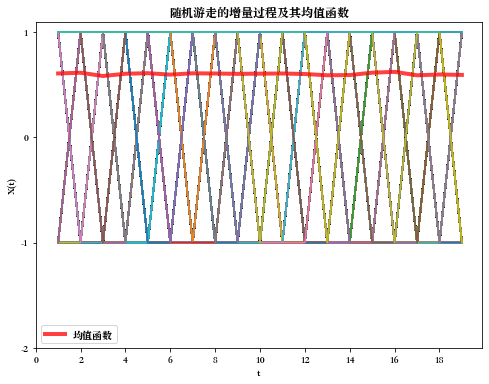

In [16]:
# 模拟随机游走的增量过程并绘制均值函数
def get_del_brown(p, n_steps):
    brown_ls = []
    x_0 = 0
    brown_ls.append(x_0)
    for i in range(n_steps-1):
        p_i = np.random.rand()
        if p_i <= p:
            brown_ls.append(x_0+1)
            x_0 += 1
        else:
            brown_ls.append(x_0-1)
            x_0 -= 1
    delta_brown_ls = []
    for i, xi in enumerate(brown_ls):
        if i != 0:
            delta_brown_ls.append(xi - brown_ls[i-1])
    return delta_brown_ls
simulate_del_brown_ls = []
p, n_steps, n_times = 0.8, 20, 10000
for i in range(n_times):
    simulate_del_brown_ls.append(get_del_brown(p = p, n_steps=n_steps))
simulate_del_brown_ls = np.array(simulate_del_brown_ls)
mean_func = np.mean(simulate_del_brown_ls, axis=0)
t = np.arange(1, n_steps)
plt.figure(figsize=(8,6))
for i in range(n_times):
    plt.plot(t, simulate_del_brown_ls[i, :])
plt.plot(t, mean_func, lw=4, color='red', alpha=0.75, label='均值函数')
plt.xlabel("t")
plt.ylabel("X(t)")
plt.title("随机游走的增量过程及其均值函数")
plt.xticks(np.arange(0, n_steps, 2))
plt.yticks(np.arange(-2, 2, 1))
plt.legend()
plt.show()

我们可以看到**如果一个随机过程是平稳独立增量过程，即：增量过程平稳且独立（均值函数是一个常数），那么这个随机过程的均值函数是一个线性函数**。

以上的平稳过程和独立增量过程等等的讨论都是基于随机过程的一些很宏观的性质进行讨论的，在实际的运用中，我们需要对实际应用场景进行讨论和建模，因此会衍生出类似于：泊松过程、马尔可夫过程等等的随机过程，这些随机过程往往是基于应用场景进行讨论和定义的。

## 2.泊松过程

### 2.1 什么是计数过程
泊松过程是一种十分常见的计数过程，计数过程在实际中有广泛的应用, 只要我们想要研究所观察的事件出现的次数, 都可以使用计数过程来描述，如：某个时间段内正在银行排队等待服务的顾客书、某条道路上的车辆数量、某个时间段内某地区的出生人数或死亡人数等等。那怎么样准确定义计数过程呢？

随机过程 $\{N(t), t \geqslant 0\}$ 称为计数过程， 如果 $N(t)$ 表示从 0 到 $t$ 时 刻某一特定事件 $A$ 发生的次数， 它具备以下两个特点:
- （1） $N(t) \geqslant 0$ 且取值为整数;
- （2）当 $s<t$ 时, $N(s) \leqslant N(t)$ 且 $N(t)-N(s)$ 表示 $(s, t]$ 时间内事件 $A$ 发生的 次数。



### 2.2 泊松过程的几个定义
由于计数过程的概念太大，如：某个事件出现的次数服从什么分布、某两个事件出现需要等待的时间满足什么分布等等，直接使用计数过程描述事物出现的次数会十分困难。泊松过程是一个定义更精确的计数过程，具体来说：

（定义一）计数过程 $\{N(t), t \geqslant 0\}$ 称为参数为 $\lambda(\lambda>0)$ 的 Poisson 过程， 如果
- (1) $N(0)=0$；
- (2) 过程有独立增量；
- (3) 在任一长度为 $t$ 的时间区间中事件发生的次数服从均值为 $\lambda t$ 的 Poisson 分布, 即对一切 $s \geqslant 0, t>0$, 有
$$
P\{N(t+s)-N(s)=n\}=\mathrm{e}^{-\lambda t} \frac{(\lambda t)^{n}}{n !}, \quad n=0,1,2, \cdots
$$

从泊松过程的定义可以看到，$N(t+s)-N(s)$ 的分布为$P\{N(t+s)-N(s)=n\}=\mathrm{e}^{-\lambda t} \frac{(\lambda t)^{n}}{n !}, \quad n=0,1,2, \cdots
$与所在时间点t无关，只与两个时刻的经历的时间段有关，因此蕴含了泊松过程是平稳增量过程（具体验证和证明后面再做）。还是由$P\{N(t+s)-N(s)=n\}=\mathrm{e}^{-\lambda t} \frac{(\lambda t)^{n}}{n !}, \quad n=0,1,2, \cdots$可以看到，一段时间段$t$内，事件发生的次数服从均值为 $\lambda t$ 的 Poisson 分布，即$E[N(t)]=\lambda t$，因此$\lambda$代表了某个时间段内时间的平均发生次数，简称发生率。

我们通过一个案例来简单说明泊松过程：

（排队论应用）设某银行从早上8:30营业，到中午12:30休息，顾客以25人/h的速度进入银行办业务，则在11:30～12:30内没有客户办理业务的概率是多少？

解：假设客户到银行办理业务的过程为泊松过程，设早上8:30开始为$t=0$时刻，那么11:30为$t=3$时刻，12:30为$t=4$时刻，顾客以25人/h的速度进入银行办业务代表了$\lambda=25$，因此在11:30～12:30内没有客户办理业务的概率可以表达为：
$$
P\{N(4)-N(3)=0\}=\mathrm{e}^{-25} \frac{(25)^{0}}{0 !}=\mathrm{e}^{-25}
$$
为什么很多描述事物出现的次数的事件能用泊松过程来描述呢？答案就是：小概率事件原理。一般来说，事物发生的次数应该使用二项分布来描述，即假设事物发生的概率为$p$，那么$N$次实验中事物发生$x$次应该服从二项分布，那为什么这里可以使用泊松分布来描述呢？这是因为二项分布在某些情况下会逼近泊松分布，为了描述二项分布逼近泊松分布，我们需要来看看什么情况下二项分布会逼近泊松分布。

In [17]:
# 二项分布逼近泊松分布
import seaborn as sns 
def binormial_vs_poisson(n, p):
    samples_times = 10000
    binormial_samples = np.random.binomial(n=[n]*samples_times, p=p)
    poisson_samples = np.random.poisson(lam=n*p, size=samples_times)
    sns.histplot(binormial_samples, label='binormail', kde=True,  alpha=0.75, color='orange', stat='probability')
    sns.histplot(poisson_samples, label='poisson', kde=True,  alpha=0.75, stat='probability')
    plt.xlabel("X")
    plt.ylabel("p(x)")
    plt.legend()
    plt.plot()


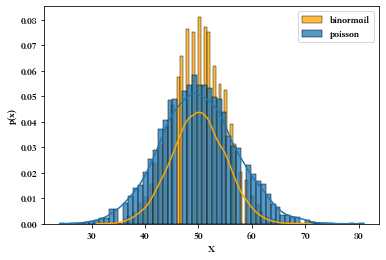

In [18]:
binormial_vs_poisson(100, 0.5)  

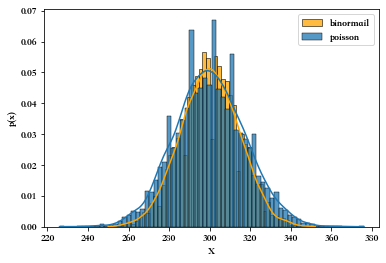

In [19]:
binormial_vs_poisson(1000, 0.3)  

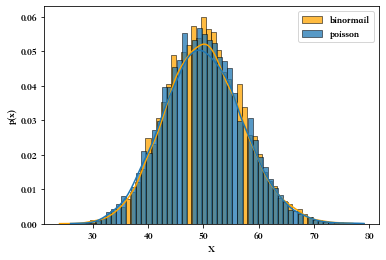

In [20]:
binormial_vs_poisson(10000, 0.005)

从上述实验可以看到，**当二项分布中的每个伯努利实验的事件发生的概率很小，而实验次数很多的话，二项分布会更加接近于泊松分布，如：道路上发生交通事故的概率很小等等** 。这个近似想法推广到随机过程，那就是虽然在很短时间内单次事件发生的概率很小，但是如果**很多个很短的时间**连接在一起，小概率事件的发生将会以一个**稳定的速率**进行，这个描述是不是很接近平稳增量过程的描述？没错，泊松过程的确是一个平稳增量过程，因此可以引出泊松过程的第二个定义：

（定义二）满足以下条件 的计数过程 $\{N(t), t \geqslant 0\}$ 是 Poisson 过程，即：
- (1)$N(0)=0$；
- (2)过程有平稳独立增量;
- (3)存在 $\lambda>0$, 当 $h \rightarrow 0$ 时, 有
$$
P\{N(t+h)-N(t)=1\}=\lambda h+o(h)
$$
- (4) 当 $h \rightarrow 0$ 时, 有
$$
P\{N(t+h)-N(t) \geqslant 2\}=o(h)
$$

如何理解以上的几个条件呢？条件（1）说明在过程的一开始，计数为0；条件（2）要求过程有平稳独立增量，目的就是像前文所说的通过连接很多个很短的时间，使得小概率事件以稳定的速率进行，从而达到二项分布近似泊松分布的目的。条件（3）说明在很短时间范围内，事件发生一次的概率很小（h很小），从而满足小概率事件的目的。条件（4）说明了小时间区间范围内事件发生两次及以上的概率几乎为0（几乎不可能）。

除了使用一个时间段内事件发生的次数服从泊松分布这个角度去定义泊松过程以外，我们还能从两次事件发生的时间的分布来定义泊松过程，而这个角度是最适合拿来做模拟实验的角度。如果$T_{n}$ 表示第 $n$ 次 $(n=1,2, \cdots)$ 事件发生的时刻, 规定 $T_{0}=0$ 。 $X_{n}$ 表示第 $n$ 次与 第 $n-1$ 次事件发生的时间间隔，那么$X_{n}(n=1,2, \cdots)$ 服从参数为 $\lambda$ 的指数分布, 且相互独立。

（定义三）如果每次事件发生的时间间隔$X_1, X_2, ...$相互独立，且服从同一个参数为$\lambda$的指数分布，那么计数过程 $\{N(t), t \geqslant 0\}$ 是参数为 $\lambda$ 的 Poisson 过程。

[]

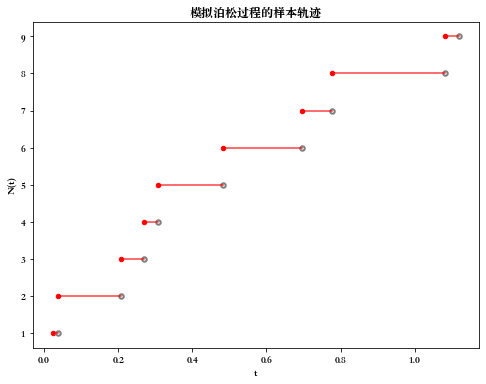

In [21]:
# 使用定义三模拟泊松过程的一条样本轨迹
def simulate_poisson(lmd, n_steps):
    exp_samples = np.random.exponential(scale=1./lmd, size=n_steps)
    t_samples = np.cumsum(exp_samples)
    return t_samples
lmd=10
n_steps=10
t_samples = simulate_poisson(lmd=lmd, n_steps=n_steps)
count_x = 0
plt.figure(figsize=(8,6))
for step in range(n_steps-1):
    count_x += 1
    plt.plot(t_samples[step:step+2], [count_x]*2, color='red', alpha=0.75)
    plt.scatter(t_samples[step], [count_x], color='red', s=20)
    plt.scatter(t_samples[step+1], [count_x], color='white', s=20, linewidths=2, edgecolors='gray')
plt.yticks(np.arange(10))
plt.xlabel("t")
plt.ylabel("N(t)")
plt.title("模拟泊松过程的样本轨迹")
plt.plot()

### 2.3 泊松过程的合成与分解

有的时候，在现实生活中不只有一个泊松过程，如：假设有一个车站，车站内有两种公交车，分别为：3号和15号，如果车站内为了乘坐3号线的乘客到来服从泊松过程$\{N_1(t)\}$，车站内为了乘坐15号线的乘客到来服从泊松过程$\{N_2(t)\}$，现在问为了坐车而来的乘客是一个什么样的过程，即$\{X(t) = N_1(t)+N_2(t)\}$是一个什么过程？这就涉及到将两个乃至于多个泊松过程的合成过程，因此：

泊松过程的合成：设 $\left\{N_{1}(t)\right\}$ 和 $\left\{N_{2}(t)\right\}$ 是强度为 $\lambda_{1}$ 和 $\lambda_{2}$ 的泊松过程， 且相互独立, 则 $\left\{N_{1}(t)+N_{2}(t)\right\}$ 是 $\lambda_{1}+\lambda_{2}$ 的泊松过程。

反过来，车站内为了乘车的乘客到来服从强度为$\lambda$的泊松过程，而每位乘客选择3号线的概率为$p$，选择15号线的概率为$1-p$。因此，乘坐三号线的乘客到来服从强度为$\lambda p$的泊松过程，乘坐15号线的乘客到来服从强度为$(1-p) \lambda$的泊松过程。具体来说：

泊松过程的分解：设 $\{N(t)\}$ 是强度为 $\lambda$ 的泊松过程， 若每个事件独立地以概率 $p$ 为类型 1 ， 以 $1-p$ 为类型 2 ， 令 $\left\{N_{1}(t)\right\}$ 和 $\left\{N_{2}(t)\right\}$ 分别表示到 $t$ 为止类型1和 类型2发生的个数， 则 $\left\{N_{1}(t)\right\}$ 和 $\left\{N_{2}(t)\right\}$ 分别是强度为 $\lambda p$ 和 $\lambda(1-p)$ 的泊松过程， 且相互独立。

案例：设有一个交通十字路口，车辆分别从东南西北驶进十字路口服从强度为5，6，7，8的泊松过程，每辆车在经过十字路口时直行、左转、右转和掉头的概率分别为：0.5，0.2，0.2和0.1，请问驶出十字路口的各个方向的泊松过程的强度是多少？

<div>
<img src='./images/1.png' width=50%>
</div>

解决办法如下：
|     | 东($\lambda = 5$)       | 南($\lambda = 6$)       | 西($\lambda = 7$)        | 北($\lambda = 8$)       | 合成                  |
| :-- | :----------------------- | :----------------------- | :----------------------- | :----------------------- | :------------------ |
| 东   | $0.1 \times 5 = 0.5$ | $0.2 \times 6 = 1.2$ | $0.5 \times 7 = 3.5$ | $0.2 \times 8 = 1.6$ | $\lambda= 6.8$  |
| 南   | $0.2 \times 5 = 1$   | $0.1 \times 6 = 0.6$ | $0.2 \times 7 = 1.4$ | $0.5 \times 8 = 4$   | $\lambda = 7$    |
| 西   | $0.5 \times 5 = 2.5$ | $0.2 \times 6 = 1.2$ | $0.1 \times 7 = 0.7$ | $0.2 \times 8 = 1.6$ | $\lambda = 6$    |
| 北   | $0.2 \times 5 = 1$   | $0.5 \times 6 = 3$   | $0.2 \times 7 = 1.4$ | $0.1 \times 8 = 0.8$ | $\lambda = 6.2$ |


### 2.4 复合泊松过程

除了多个泊松过程的合成和分解，有时候我们需要研究多个步骤的“复合”，如：顾客先进入商店，再选择买东西。现在用一个场景给大家介绍什么是复合泊松过程：假设顾客进入商店的过程是一个泊松过程，这个客户进入商店后买东西的金额是服从某个分布的随机变量，现在想要研究某个时间段内商店的营业额。这个问题是典型的复合泊松过程问题，具体来说：

 $\{N(t), t \geqslant 0\}$ 是强度为 $\lambda$ 的泊松过程, $\left\{Y_{k}, k=1,2, \cdots\right\}$ 是一 列独立同分布随机变量， 且与 $\{N(t), t \geqslant 0\}$ 独立， 令
$$
X(t)=\sum_{k=1}^{N(t)} Y_{k}, \quad t \geqslant 0,
$$
则称 $\{X(t), t \geqslant 0\}$ 为复合泊松过程。

在复合泊松过程中，我们可能更加关注的是$X(t)$的均值和方差，即：若 $\mathrm{E}\left(\mathrm{Y}_{\mathrm{i}}^{2}\right)<+\infty$, 则 $\mathrm{E}[\mathrm{X}(\mathrm{t})]=\lambda \mathrm{tE}\left(\mathrm{Y}_{1}\right), \operatorname{Var}[\mathrm{X}(\mathrm{t})]=\lambda \mathrm{t} E\left(\mathrm{Y}_{1}^{2}\right)$

**以上统计时间段内的营业额的仿真留在2.5后再给出～**

### 2.5  泊松过程的案例：

#### 2.5.1 道路口的车辆数统计

在本次案例中，我们主要掌握如何使用简单的simpy进行仿真的流程，simpy的具体语法将在后续课程给大家详细解答，这里只需要直观感受下仿真的流程即可。

案例说明：为了改善道路的路面情况（道路经常维修，坑坑洼洼），因此想统计一天中有多少车辆经过，因为每天的车辆数都是随机的，一般来说有两种技术解决这个问题：
- （1）在道路附近安装一个计数器或安排一个技术人员，在一段长时间的天数（如365天）每天24h统计通过道路的车辆数。
- （2）使用仿真技术大致模拟下道路口的场景，得出一个近似可用的仿真统计指标。

由于方案（1）需要花费大量的人力物力以及需要花费大量的调研时间，虽然能得出准确的结果，但是有时候在工程应用中并不允许。因此，我们选择方案（2），我们通过一周的简单调查，得到每天的每个小时平均车辆数：[30, 20, 10, 6, 8, 20, 40, 100, 250, 200, 100, 65, 100, 120, 100, 120, 200, 220, 240, 180, 150, 100, 50, 40]，通过利用平均车辆数进行仿真：

In [22]:
# 模拟仿真研究该道路口一天平均有多少车经过
import simpy

class Road_Crossing:
    def __init__(self, env):
        self.road_crossing_container = simpy.Container(env, capacity = 1e8, init = 0)
    
def come_across(env, road_crossing, lmd):
    while True:
        body_time = np.random.exponential(1.0/(lmd/60))  # 经过指数分布的时间后，泊松过程记录数+1
        yield env.timeout(body_time)  # 经过body_time个时间
        yield road_crossing.road_crossing_container.put(1)

hours = 24  # 一天24h
minutes = 60  # 一个小时60min
days = 3   # 模拟3天
lmd_ls = [30, 20, 10, 6, 8, 20, 40, 100, 250, 200, 100, 65, 100, 120, 100, 120, 200, 220, 240, 180, 150, 100, 50, 40]   # 每隔小时平均通过车辆数
car_sum = []  # 存储每一天的通过路口的车辆数之和
print('仿真开始：')
for day in range(days):
    day_car_sum = 0   # 记录每天的通过车辆数之和
    for hour, lmd in enumerate(lmd_ls):
        env = simpy.Environment()
        road_crossing = Road_Crossing(env)
        come_across_process = env.process(come_across(env, road_crossing, lmd))
        env.run(until = 60)  # 每次仿真60min
        if hour % 4 == 0:
            print("第"+str(day+1)+"天，第"+str(hour+1)+"时的车辆数：", road_crossing.road_crossing_container.level)
        day_car_sum += road_crossing.road_crossing_container.level
    car_sum.append(day_car_sum)
print("每天通过交通路口的的车辆数之和为：", car_sum)

仿真开始：
第1天，第1时的车辆数： 23
第1天，第5时的车辆数： 15
第1天，第9时的车辆数： 275
第1天，第13时的车辆数： 105
第1天，第17时的车辆数： 223
第1天，第21时的车辆数： 160
第2天，第1时的车辆数： 31
第2天，第5时的车辆数： 5
第2天，第9时的车辆数： 246
第2天，第13时的车辆数： 102
第2天，第17时的车辆数： 214
第2天，第21时的车辆数： 150
第3天，第1时的车辆数： 21
第3天，第5时的车辆数： 5
第3天，第9时的车辆数： 234
第3天，第13时的车辆数： 94
第3天，第17时的车辆数： 203
第3天，第21时的车辆数： 154
每天通过交通路口的的车辆数之和为： [2571, 2405, 2408]


#### 2.5.2 复合泊松过程案例
现在，我们来仿真“每天的商店营业额”这个复合泊松过程吧。首先，我们假设每个小时进入商店的平均人数为：[10, 5, 3, 6, 8, 10, 20, 40, 100, 80, 40, 50, 100, 120, 30, 30, 60, 80, 100, 150, 70, 20, 20, 10]，每位顾客的平均花费为：10元（大约一份早餐吧），请问每天商店的营业额是多少？

In [23]:
# 模拟仿真研究该商店一天的营业额
import simpy

class Store_Money:
    def __init__(self, env):
        self.store_money_container = simpy.Container(env, capacity = 1e8, init = 0)
    
def buy(env, store_money, lmd, avg_money):
    while True:
        body_time = np.random.exponential(1.0/(lmd/60))  # 经过指数分布的时间后，泊松过程记录数+1
        yield env.timeout(body_time) 
        money = np.random.poisson(lam=avg_money)
        yield store_money.store_money_container.put(money)

hours = 24  # 一天24h
minutes = 60  # 一个小时60min
days = 3   # 模拟3天
avg_money = 10
lmd_ls = [10, 5, 3, 6, 8, 10, 20, 40, 100, 80, 40, 50, 100, 120, 30, 30, 60, 80, 100, 150, 70, 20, 20, 10]   # 每个小时平均进入商店的人数
money_sum = []  # 存储每一天的商店营业额总和
print('仿真开始：')
for day in range(days):
    day_money_sum = 0   # 记录每天的营业额之和
    for hour, lmd in enumerate(lmd_ls):
        env = simpy.Environment()
        store_money = Store_Money(env)
        store_money_process = env.process(buy(env, store_money, lmd, avg_money))
        env.run(until = 60)  # 每次仿真60min
        if hour % 4 == 0:
            print("第"+str(day+1)+"天，第"+str(hour+1)+"时的营业额：", store_money.store_money_container.level)
        day_money_sum += store_money.store_money_container.level
    money_sum.append(day_money_sum)
print("每天商店的的营业额之和为：", money_sum)

仿真开始：
第1天，第1时的营业额： 83
第1天，第5时的营业额： 42
第1天，第9时的营业额： 1028
第1天，第13时的营业额： 917
第1天，第17时的营业额： 598
第1天，第21时的营业额： 797
第2天，第1时的营业额： 139
第2天，第5时的营业额： 150
第2天，第9时的营业额： 1054
第2天，第13时的营业额： 1046
第2天，第17时的营业额： 473
第2天，第21时的营业额： 823
第3天，第1时的营业额： 138
第3天，第5时的营业额： 22
第3天，第9时的营业额： 996
第3天，第13时的营业额： 1076
第3天，第17时的营业额： 580
第3天，第21时的营业额： 666
每天商店的的营业额之和为： [11691, 11823, 12284]


## 3.马尔可夫过程

有的时候，我们想已知过去和现在的信息预测未来，能做到吗？这是一个十分开放的话题，如果在这里承认做不到，那就打脸开这门课的理由了。事实上，在基于一定的假设之下可以做到预测未来，而时间序列分析就是干这事的。现在，我们不谈时间序列分析，想看看基于什么假设下，我们比较容易“预测”未来，这个假设叫做——马尔可夫假设。马尔可夫假设说的是假设未来只与现在有关，与过去是没有关系的。这个假设合理吗？事实上，这个马尔可夫假设在某些情况下是对现实的合理简化，可以用一个例子给大家说明：假如想去预测一位高考刚出成绩的大神被哪所大学录取，其实我并不需要知道这位大神在高中三年、初中三年以及小学六年付出了多少努力，只需要知道他高考考了几分，排位如何就可以了。因此，从上面高考录取的案例来说，未来（被哪所学校录取）往往与过去（高中、初中和小学的努力）是没有关系的，只与现在（高考考了多少分）有关系，这个就是马尔可夫假设的一个合理解释。正所谓，人生就像是一个马尔可夫链，你的未来取决于你当下正在做的事，当下做的决定，而与过去做完的事无关，骄兵必败。

### 3.1 什么是马尔可夫性

马尔可夫性质是因俄国数学家安德烈·马尔可夫而得名，其含义是：当一个随机过程在给定现在状态及所有过去状态情况下，其未来状态的条件概率分布仅依赖于当前状态；换句话说，在给定现在状态时，它与过去状态（即该过程的历史路径）是条件独立的，那么此随机过程即具有马尔可夫性质。马尔可夫假设则是用来假设一个模型具有马尔可夫性质，比如隐马尔可夫模型。具体来说，马尔可夫性是指：

设 $\{X(t), t \in T\}$ 为一随机过程， $E$ 为其状态空间，若对任意的 $t_{1}<t_{2}<\cdots<t_{n}<t$ ，任意的 $x_{1}, x_{2}, \cdots, x_{n}, x, \in E$ ，随机变量 $\mathrm{X}(t)$ 在已知变量 $X\left(t_{1}\right)=x_{1}, \cdots, X\left(t_{n}\right)=x_{n}$ 之下的条件分布函数只与 $X\left(t_{n}\right)=x_{n}$ 有关，而与 $X\left(t_{1}\right)=x_{1}, \cdots, X\left(t_{n-1}\right)=x_{n-1}$ 无关，即条件分布函数满足等式
$$
F\left(x, t \mid x_{n}, x_{n-1}, \cdots, x_{2}, x_{1}, t_{n}, t_{n-1}, \cdots, t_{2}, t_{1}\right)=F\left(x, t \mid x_{n}, t_{n}\right)
$$
即
$$
P\left\{X(t) \leqslant x \mid X\left(t_{n}\right)=x_{n}, \cdots, X\left(t_{1}\right)=x_{1}\right\}=P\left\{X(t) \leqslant x \mid X\left(t_{n}\right)=x_{n}\right\}
$$
此性质称为马尔可夫性，亦称无后效性或无记忆性。

### 3.2 初始分布、转移概率与转移概率矩阵

在介绍初始分布、转移概率和转移概率矩阵之前，我们先看一个例子，通过这个例子我们来学习这几个概念。

社会学家通过长时间的观察与研究发现：决定一个人的收入阶层最重要的因素就是其父母的收入阶层。现在，社会学家将社会的人口分成三个层级：上层人、中层人和底层人，分别用1、2、3来表示。通过研究父代和子代的社会阶层关系，社会学家发现：如果一个人的收入属于底层人，则它的孩子属于底层收入的概率为0.65，属于中层收入的概率为0.28，属于上层收入的概率为0.07等等，可以将规律汇总：

<table style="border-collapse: collapse; border: none; border-spacing: 0px;">
	<tr>
		<td colspan="5" style="padding-right: 3pt; padding-left: 3pt;">
			&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;子代
			<br>
		</td>
	</tr>
	<tr>
		<td rowspan="4" style="padding-right: 3pt; padding-left: 3pt;">
			父代
		</td>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			状态
		</td>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			1
		</td>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			2
		</td>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			3
		</td>
	</tr>
	<tr>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			1
		</td>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			0.52
		</td>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			0.36
		</td>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			0.12
		</td>
	</tr>
	<tr>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			2
		</td>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			0.18
		</td>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			0.67
		</td>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			0.15
		</td>
	</tr>
	<tr>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			3
		</td>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			0.07
		</td>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			0.28
		</td>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			0.65
		</td>
	</tr>
</table>

假设现在的社会阶层的分布为：$[0.110, 0.680, 0.210]$，请问N年后社会阶层的分布是如何？

在上面的案例中，社会在还没开始衍化时的阶层分布为**初始分布**，即：$[0.110, 0.680, 0.210]$;父代状态为1（上层），子代状态为1（上层）的概率为0.52，这个概率就是**转移概率**，记作：$p_{11}$，代表由状态1一步转移到状态1的概率。按照这个描述，应该还有$p_{12}, p_{13}, p_{21}, ..., p_{33}$，这些都是转移概率。将所有的转移概率形成一个矩阵，即：
<table style="border-collapse: collapse; border: none; border-spacing: 0px;">
	<tr>
		<td colspan="5" style="padding-right: 3pt; padding-left: 3pt;">
			&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;子代
			<br>
		</td>
	</tr>
	<tr>
		<td rowspan="4" style="padding-right: 3pt; padding-left: 3pt;">
			父代
		</td>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			状态
		</td>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			1
		</td>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			2
		</td>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			3
		</td>
	</tr>
	<tr>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			1
		</td>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			0.52
		</td>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			0.36
		</td>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			0.12
		</td>
	</tr>
	<tr>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			2
		</td>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			0.18
		</td>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			0.67
		</td>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			0.15
		</td>
	</tr>
	<tr>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			3
		</td>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			0.07
		</td>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			0.28
		</td>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			0.65
		</td>
	</tr>
</table>

这个将所有的转移概率囊括其中的概率矩阵称为转移概率矩阵，**转移概率矩阵的每一行的概率和为1**，这是显然的，因为由某个状态转化到所有已知状态的概率和肯定是1。

那如何回答“假设现在的社会阶层的分布为：$[0.110, 0.680, 0.210]$，请问N年后社会阶层的分布是如何？”这个问题呢？我们可以使用python模拟这个过程：

In [24]:
# 模拟N年后的社会阶层的分布情况
def get_years_dist(p0, P, N):
    P1 = P
    for i in range(N):
        P1 = np.matmul(P1, P)
    return np.matmul(p0, P1)

p0 = np.array([0.110, 0.680, 0.210])
P = np.array([
    [0.52, 0.36, 0.12],
    [0.18, 0.67, 0.15],
    [0.07, 0.28, 0.65]
])
print("初始阶层分布为",p0)
N = 20
for year in range(N):
    print("第"+str(year+1)+"年后的阶层分布为",np.round(get_years_dist(p0, P, year+1), 6))

初始阶层分布为 [0.11 0.68 0.21]
第1年后的阶层分布为 [0.218375 0.511604 0.270021]
第2年后的阶层分布为 [0.224545 0.496996 0.278459]
第3年后的阶层分布为 [0.225715 0.491792 0.282493]
第4年后的阶层分布为 [0.225669 0.489856 0.284475]
第5年后的阶层分布为 [0.225435 0.489097 0.285468]
第6年后的阶层分布为 [0.225247 0.488783 0.285971]
第7年后的阶层分布为 [0.225127 0.488645 0.286228]
第8年后的阶层分布为 [0.225058 0.488582 0.28636 ]
第9年后的阶层分布为 [0.22502  0.488552 0.286428]
第10年后的阶层分布为 [0.225    0.488537 0.286464]
第11年后的阶层分布为 [0.224989 0.488529 0.286482]
第12年后的阶层分布为 [0.224983 0.488526 0.286491]
第13年后的阶层分布为 [0.22498  0.488524 0.286496]
第14年后的阶层分布为 [0.224979 0.488523 0.286499]
第15年后的阶层分布为 [0.224978 0.488522 0.2865  ]
第16年后的阶层分布为 [0.224977 0.488522 0.286501]
第17年后的阶层分布为 [0.224977 0.488522 0.286501]
第18年后的阶层分布为 [0.224977 0.488522 0.286501]
第19年后的阶层分布为 [0.224977 0.488522 0.286501]
第20年后的阶层分布为 [0.224977 0.488522 0.286501]


大家从代码上看清楚马尔可夫过程的转化规律了吗？事实上，马尔可夫过程只需要知道初始分布以及转移概率矩阵就可以知道往后任意一时间点的状态分布，计算规律非常简单，只需要使用初始分布与转移概率矩阵的N次幂的矩阵乘法，N代表了经过了N个时间点。

### 3.3 平稳分布

大家仔细观察N年的阶层分布的转化规律，是不是发现在转化了16年后，阶层分布开始稳定在一个确定的分布：$[0.224977 0.488522 0.286501]$，这是偶然吗？我们来用一个实验来验证下这个观点。在这个案例，我们将使用三个不同的初始分布：$[0.1, 0.8, 0.1]$，$[0.8, 0.1, 0.1]$和$[0.1, 0.1, 0.8]$，观察在三个初始分布不同情况下，最终是否会有稳定的分布？

In [25]:
# 使用3个不同的初始分布，模拟N年后的社会阶层的分布情况
def get_years_dist(p0, P, N):
    P1 = P
    for i in range(N):
        P1 = np.matmul(P1, P)
    return np.matmul(p0, P1)

p1 = np.array([0.1, 0.8, 0.1])
p2 = np.array([0.8, 0.1, 0.1])
p3 = np.array([0.1, 0.1, 0.8])
p_list = [p1, p2, p3]
P = np.array([
    [0.52, 0.36, 0.12],
    [0.18, 0.67, 0.15],
    [0.07, 0.28, 0.65]
])

for i, p_i in enumerate(p_list):
    print("+++++++++++++++p"+str(i+1)+"的实验+++++++++++++++++")
    print("初始阶层分布为",p_i)
    N = 30
    for year in range(N):
        print("第"+str(year+1)+"年后的阶层分布为",np.round(get_years_dist(p_i, P, year+1), 6))

+++++++++++++++p1的实验+++++++++++++++++
初始阶层分布为 [0.1 0.8 0.1]
第1年后的阶层分布为 [0.22735 0.53024 0.24241]
第2年后的阶层分布为 [0.230634 0.504982 0.264385]
第3年后的阶层分布为 [0.229333 0.495394 0.275273]
第4年后的阶层分布为 [0.227693 0.49155  0.280757]
第5年后的阶层分布为 [0.226532 0.48992  0.283548]
第6年后的阶层分布为 [0.225831 0.489191 0.284978]
第7年后的阶层分布为 [0.225435 0.488851 0.285714]
第8年后的阶层分布为 [0.225219 0.488687 0.286094]
第9年后的阶层分布为 [0.225104 0.488605 0.28629 ]
第10年后的阶层分布为 [0.225043 0.488564 0.286392]
第11年后的阶层分布为 [0.225012 0.488544 0.286445]
第12年后的阶层分布为 [0.224995 0.488533 0.286472]
第13年后的阶层分布为 [0.224986 0.488527 0.286486]
第14年后的阶层分布为 [0.224982 0.488525 0.286493]
第15年后的阶层分布为 [0.22498  0.488523 0.286497]
第16年后的阶层分布为 [0.224978 0.488522 0.286499]
第17年后的阶层分布为 [0.224978 0.488522 0.2865  ]
第18年后的阶层分布为 [0.224977 0.488522 0.286501]
第19年后的阶层分布为 [0.224977 0.488522 0.286501]
第20年后的阶层分布为 [0.224977 0.488522 0.286501]
第21年后的阶层分布为 [0.224977 0.488522 0.286501]
第22年后的阶层分布为 [0.224977 0.488522 0.286501]
第23年后的阶层分布为 [0.224977 0.488522 0.286501]
第24年后的阶层分

通过以上实验，我们发现了一个神奇的事实：无论初始分布如何，只要转移概率矩阵不变，最终整个社会的阶层分布都会是$[0.224977 0.488522 0.286501]$。因此，$[0.224977 0.488522 0.286501]$称为该转移概率矩阵的平稳分布，平稳分布与初始分布是没有关系的，只与转移概率矩阵有关。

如果存在 状态空间$E$ 上的概率分布 $\pi=\left(\pi_{0}, \pi_{1, \ldots}\right)$, 满足矩阵方程
$$
\pi=\pi P
$$
则称 $\pi$ 为马尔可夫链的平稳分布。

现在这个定义就十分好理解了，平稳分布说白了就是某个分布如果经过转移概率矩阵的转化后还是这个分布不变，那该分布就是对应转移概率矩阵的平稳分布。

最后，我们从现实的意义来评价下这个社会阶层衍化的案例：社会阶层的转移概率矩阵相当于各阶层的人跃迁的通道，在现实的角度类似于国民教育，而平稳分布于初始分布是无关的，只与转移概率矩阵是有关系的。如果政府不加以干预，让某种不好的转化延续下去，将导致社会阶层的固化，而这也应该是这次打击校外培训的目的吧（不能展开了哈哈）。

## 3.4 马尔可夫过程的案例

艾滋病发展过程分为四个阶段（状态），急性感染期（状态 1）、无症状期（状态 2）， 艾滋病前期（状态 3）, 典型艾滋病期（状态 4）。艾滋病发展过程基本上是一个不可逆的过程,即：状态1 -> 状态2 -> 状态3 -> 状态4。现在收集某地600例艾滋病防控数据，得到以下表格：

<table style="border-collapse: collapse; border: none; border-spacing: 0px;">
	<tr>
		<td colspan="7" style="padding-right: 3pt; padding-left: 3pt;">
			&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; 转移后
		</td>
	</tr>
	<tr>
		<td rowspan="6" style="padding-right: 3pt; padding-left: 3pt;">
			转移前
		</td>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			状态
		</td>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			1
		</td>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			2
		</td>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			3
		</td>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			4
		</td>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			总计
		</td>
	</tr>
	<tr>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			1
		</td>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			10
		</td>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			62
		</td>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			5
		</td>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			3
		</td>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			80
		</td>
	</tr>
	<tr>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			2
		</td>
		<td style="padding-right: 3pt; padding-left: 3pt;">
		</td>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			140
		</td>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			93
		</td>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			57
		</td>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			290
		</td>
	</tr>
	<tr>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			3
		</td>
		<td style="padding-right: 3pt; padding-left: 3pt;">
		</td>
		<td style="padding-right: 3pt; padding-left: 3pt;">
		</td>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			180
		</td>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			40
		</td>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			220
		</td>
	</tr>
	<tr>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			4
		</td>
		<td style="padding-right: 3pt; padding-left: 3pt;">
		</td>
		<td style="padding-right: 3pt; padding-left: 3pt;">
		</td>
		<td style="padding-right: 3pt; padding-left: 3pt;">
		</td>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			10
		</td>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			10
		</td>
	</tr>
	<tr>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			总计
		</td>
		<td style="padding-right: 3pt; padding-left: 3pt;">
		</td>
		<td style="padding-right: 3pt; padding-left: 3pt;">
		</td>
		<td style="padding-right: 3pt; padding-left: 3pt;">
		</td>
		<td style="padding-right: 3pt; padding-left: 3pt;">
		</td>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			600
		</td>
	</tr>
</table>

现在，我们希望计算若一个人此时是无症状期（状态2）在10次转移之后，这个人的各状态的概率是多少？

In [26]:
# 研究无症状期病人在10期转移后的状态分布
def get_years_dist(p0, P, N):
    P1 = P
    for i in range(N):
        P1 = np.matmul(P1, P)
    return np.matmul(p0, P1)

p0 = np.array([0, 1, 0, 0])
P = np.array([
    [10.0/80, 62.0/80, 5.0/80, 3.0/80],
    [0, 140.0/290, 93.0/290, 57.0/290],
    [0, 0, 180.0/220, 40.0/220],
    [0, 0, 0, 1]
])
N = 10
print(str(N)+"期转移后，状态分布为：", np.round(get_years_dist(p0, P, N), 4))

10期转移后，状态分布为： [0.000e+00 3.000e-04 1.048e-01 8.948e-01]


# 4.实战建模

## 4.1 泊松过程实战：十字路口交通压力仿真（泊松过程的合成和分解）

本次仿真，我们来复现之前在“泊松过程的合成与分解”章节的十字路口的例子，先来回顾下：

设有一个交通十字路口，车辆分别从东南西北驶进十字路口服从强度为5，6，7，8的泊松过程，每辆车在经过十字路口时直行、左转、右转和掉头的概率分别为：0.5，0.2，0.2和0.1，请问驶出十字路口的各个方向的泊松过程的强度是多少？

<div>
<img src='./images/1.png' width=50%>
</div>

解决办法如下：
|     | 东($\lambda = 5$)       | 南($\lambda = 6$)       | 西($\lambda = 7$)        | 北($\lambda = 8$)       | 合成                  |
| :-- | :----------------------- | :----------------------- | :----------------------- | :----------------------- | :------------------ |
| 东   | $0.1 \times 5 = 0.5$ | $0.2 \times 6 = 1.2$ | $0.5 \times 7 = 3.5$ | $0.2 \times 8 = 1.6$ | $\lambda= 6.8$  |
| 南   | $0.2 \times 5 = 1$   | $0.1 \times 6 = 0.6$ | $0.2 \times 7 = 1.4$ | $0.5 \times 8 = 4$   | $\lambda = 7$    |
| 西   | $0.5 \times 5 = 2.5$ | $0.2 \times 6 = 1.2$ | $0.1 \times 7 = 0.7$ | $0.2 \times 8 = 1.6$ | $\lambda = 6$    |
| 北   | $0.2 \times 5 = 1$   | $0.5 \times 6 = 3$   | $0.2 \times 7 = 1.4$ | $0.1 \times 8 = 0.8$ | $\lambda = 6.2$ |

前面的计算，我们是使用结论的方式计算的，现在我们使用仿真的技术来实现这个案例：


In [27]:
class CrossRoad:
    def __init__(self, env):
        self.left = simpy.Container(env, capacity=1e8, init=0)  # 记录左转的次数
        self.right = simpy.Container(env, capacity=1e8, init=0)  # 记录右转的次数
        self.straight = simpy.Container(env, capacity=1e8, init=0)   # 记录直行的次数
        self.turn = simpy.Container(env, capacity=1e8, init=0)   # 记录掉头的次数


def car_cross(env, cross_road, lmd):    # 模拟从某个方向来的车辆在左转、右转、直走和掉头的次数
    while True:
        yield env.timeout(np.random.exponential(scale=1. / lmd))
        east_choice = np.random.choice(['left', 'right', 'straight', 'turn'], p=[0.2, 0.2, 0.5, 0.1])
        if east_choice == 'left':
            cross_road.left.put(1)
        if east_choice == 'right':
            cross_road.right.put(1)
        if east_choice == 'straight':
            cross_road.straight.put(1)
        if east_choice == 'turn':
            cross_road.turn.put(1)


if __name__ == "__main__":
    car_num = np.zeros([4, 4])  # 记录从🧍每个方向到各个方向的车流量，行代表从某个方向出去，列代表到达哪个方向
    total_times = 60 * 24 * 100  # 60min * 24hour * 100day
    for i, (direction, lmd) in enumerate(zip(["east", "south", "west", "north"], [5.0, 6.0, 7.0, 8.0])):
        env = simpy.Environment()
        cross_road = CrossRoad(env)
        direction_cross = env.process(car_cross(env, cross_road, lmd))
        env.run(until=total_times)
        if direction == "east":
            car_num[i, 0] = cross_road.turn.level  # east -> east
            car_num[i, 1] = cross_road.left.level  # east -> south
            car_num[i, 2] = cross_road.straight.level   # east -> west
            car_num[i, 3] = cross_road.right.level    # east -> north
        elif direction == "south":
            car_num[i, 0] = cross_road.right.level  # south -> east
            car_num[i, 1] = cross_road.turn.level
            car_num[i, 2] = cross_road.left.level
            car_num[i, 3] = cross_road.straight.level
        elif direction == "west":
            car_num[i, 0] = cross_road.straight.level  # west -> east
            car_num[i, 1] = cross_road.right.level
            car_num[i, 2] = cross_road.turn.level
            car_num[i, 3] = cross_road.left.level
        else:
            car_num[i, 0] = cross_road.left.level  # north -> east
            car_num[i, 1] = cross_road.straight.level
            car_num[i, 2] = cross_road.right.level
            car_num[i, 3] = cross_road.turn.level
    directions_lmd = np.round(np.sum(car_num, axis=0) / total_times, 1)
    print("东路口的lmd=", directions_lmd[0])
    print("南路口的lmd=", directions_lmd[1])
    print("西路口的lmd=", directions_lmd[2])
    print("北路口的lmd=", directions_lmd[3])

东路口的lmd= 6.8
南路口的lmd= 7.0
西路口的lmd= 6.0
北路口的lmd= 6.2


仿真的结果与理论计算完全一致！

## 4.2 马尔可夫过程实战：预测上证指数的涨跌问题

在本次案例中，我们主要是用马尔可夫链预测上证指数的点位，这个案例十分有价值。上海证券综合指数简称“上证指数”或“上证综指”，上证指数的样本股是在上海证券交易所全部上市股票，包括A股和B股，因此上证指数反映了上海证券交易所上市股票价格的变动情况，自1991年7月15日起正式发布。下面对上证指数的计算方法做一个简介：
- 在众多股票中抽取多只具有代表性的股票；
- 按单价或总值加权平均，或不加权平均；
- 计算算术平均数、几何平均数，或兼顾价格与总值；

那该怎么预测上证指数呢？首先，我们需要获取上证指数的历史数据。

login success!
login respond error_code:0
login respond  error_msg:success
query_history_k_data_plus respond error_code:0
query_history_k_data_plus respond  error_msg:success


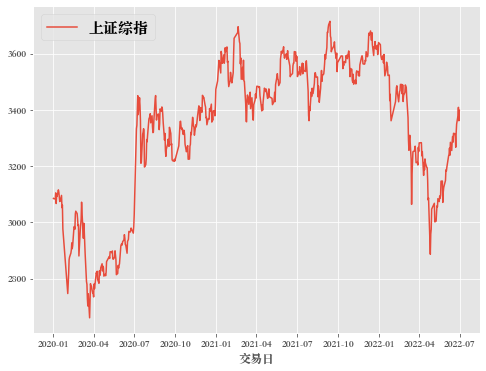

In [93]:
import baostock as bs
from pylab import mpl
plt.style.use('ggplot')
# 登陆系统
lg = bs.login()
# 显示登陆返回信息
print('login respond error_code:'+lg.error_code)
print('login respond  error_msg:'+lg.error_msg)

stock_code = 'sh.000001'
stock_name = '上证综指'
rs = bs.query_history_k_data_plus(stock_code,
    "date,code,open,high,low,close,preclose,volume,amount,pctChg",
    start_date='2020-01-02', end_date='2022-06-30', frequency="d")
print('query_history_k_data_plus respond error_code:'+rs.error_code)
print('query_history_k_data_plus respond  error_msg:'+rs.error_msg)
# 打印结果集
data_list = []
while (rs.error_code == '0') & rs.next():
    # 获取一条记录，将记录合并在一起
    data_list.append(rs.get_row_data())
result = pd.DataFrame(data_list, columns=rs.fields)
result['date'] = pd.to_datetime(result['date'])
result['close'] = result['close'].astype("float")

# 绘图
plt.figure(figsize=(8, 6))
plt.plot(result['date'],result['close'],c="#e74c3c")
plt.legend((stock_name,),loc = 'best',fontsize=15)
plt.xlabel('交易日')
plt.xticks()
plt.show()

观察以上上证指数的收盘价信息可以知道：自疫情到现在，点数维持在2600点到3800点之间，但是指数在日价格变化是不敏感的，我们可以研究月的变化。因此，我们需要提取每个月末的上证指数的收盘价：

In [94]:
month_close = pd.DataFrame(result.groupby([result['date'].dt.year, result['date'].dt.month])['date', 'close'].last().values, columns=['date', 'close'])
month_close

<ipython-input-94-9989eb2b2e7a>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  month_close = pd.DataFrame(result.groupby([result['date'].dt.year, result['date'].dt.month])['date', 'close'].last().values, columns=['date', 'close'])


,date,close
0,2020-01-23,2976.528
1,2020-02-28,2880.303
2,2020-03-31,2750.2962
3,2020-04-30,2860.0822
4,2020-05-29,2852.3512
5,2020-06-30,2984.6741
6,2020-07-31,3310.0065
7,2020-08-31,3395.6775
8,2020-09-30,3218.0521
9,2020-10-30,3224.5325


接下来，我们来看看上证指数自疫情以来月末收盘价的范围：

In [95]:
print("月末最低收盘价：", month_close['close'].min())
print("月末最高收盘价：", month_close['close'].max())

月末最低收盘价： 2750.2962
月末最高收盘价： 3639.7754


因此，我们知道，上证指数自疫情以来的月末收盘价为2700～3700之间。按照马尔可夫链的习惯，我们需要将这个范围分成几个离散的状态，因此：
- (2700-2900]之间为状态1
- (2900-3100]之间为状态2
- (3100-3300]之间为状态3
- (3300-3500]之间为状态4
- (3500-3700]之间为状态5

In [96]:
# 获取上证指数的状态
month_close['state'] = 0
month_close.loc[(month_close['close']>2700)&(month_close['close']<=2900), 'state'] = 1
month_close.loc[(month_close['close']>2900)&(month_close['close']<=3100), 'state'] = 2
month_close.loc[(month_close['close']>3100)&(month_close['close']<=3300), 'state'] = 3
month_close.loc[(month_close['close']>3300)&(month_close['close']<=3500), 'state'] = 4
month_close.loc[(month_close['close']>3500)&(month_close['close']<=3700), 'state'] = 5
month_close

,date,close,state
0,2020-01-23,2976.528,2
1,2020-02-28,2880.303,1
2,2020-03-31,2750.2962,1
3,2020-04-30,2860.0822,1
4,2020-05-29,2852.3512,1
5,2020-06-30,2984.6741,2
6,2020-07-31,3310.0065,4
7,2020-08-31,3395.6775,4
8,2020-09-30,3218.0521,3
9,2020-10-30,3224.5325,3


接下来，我们需要获取转移概率矩阵，这里我们留个心眼，把后半年的数据作为验证数据，看看马尔可夫链在上证指数的预测上表现如何？

In [97]:
# 分割分析数据集与验证数据集
pred_data = month_close.loc[month_close['date']>='2022-01-01', :]  # 验证数据集
analysis_data = month_close.loc[month_close['date']< '2022-01-01', :]
state_list = [1, 2, 3, 4, 5]
P = np.zeros([len(state_list), len(state_list)])
for state1 in state_list:
    index1 = np.where(analysis_data['state']==state1)[0]
    index1 = np.array([i for i in index1 if i+1 < len(analysis_data)])
    for state2 in state_list:
        P[state1-1, state2-1] = (analysis_data.iloc[(index1+1), -1]==state2).sum()
P_trans = np.zeros_like(P)
for i in range(P.shape[0]):
    for j in range(P.shape[1]):
        P_trans[i, j] = P[i, j] / np.sum(P[i, :], axis=0)
P_trans

array([[0.75      , 0.25      , 0.        , 0.        , 0.        ],
       [0.5       , 0.        , 0.        , 0.5       , 0.        ],
       [0.        , 0.        , 0.5       , 0.5       , 0.        ],
       [0.        , 0.        , 0.125     , 0.5       , 0.375     ],
       [0.        , 0.        , 0.        , 0.28571429, 0.71428571]])

接下来，我们将拿到的转移概率矩阵与初始分布做六个月的转移，即
- 初始分布为：2021-12-31的状态5
- 转移概率矩阵为：P

In [98]:
p0 = np.array([0, 0, 0, 0, 1])
for i in range(6):
    p0 = np.matmul(p0, P_trans)
    print("第"+str(i+1)+"月预测的指数状态分布为：", p0)
    print("第"+str(i+1)+"月真实的指数状态为：",pred_data.iloc[i, :]['state'])

第1月预测的指数状态分布为： [0.         0.         0.         0.28571429 0.71428571]
第1月真实的指数状态为： 4
第2月预测的指数状态分布为： [0.         0.         0.03571429 0.34693878 0.61734694]
第2月真实的指数状态为： 4
第3月预测的指数状态分布为： [0.         0.         0.06122449 0.36771137 0.57106414]
第3月真实的指数状态为： 3
第4月预测的指数状态分布为： [0.         0.         0.07657617 0.37762911 0.54579472]
第4月真实的指数状态为： 2
第5月预测的指数状态分布为： [0.         0.         0.08549172 0.38304399 0.53146429]
第5月真实的指数状态为： 3
第6月预测的指数状态分布为： [0.         0.         0.09062636 0.3861148  0.52325885]
第6月真实的指数状态为： 4


总结一句：看来市场不是简单的预测就能预测的，我们使用的马尔可夫是简单的一阶马尔可夫模型，是最简单的马尔可夫模型。对于时间序列预测更加详细的方法，我们将在后续的时间序列预测专题中更加详细地给出，那时候我们就会拥有准确率更高的模型。